# Project Notebook

## Social Data Science - exam notebook


#### Authors: 
#### Anton Maach-Møller
#### Christian Nøjgaard Fogdal

## 1. Installations

In [1]:
# pip install geopy
# pip install textblob
# pip install vaderSentiment
# pip install emoji
# nltk.download('stopwords')
# nltk.download('vader_lexicon')
# pip install statsmodels
# pip install Wikipedia-API
# pip install chart_studio

## 2. Import of used packages

In [1]:
# basic
import numpy as np
import pandas as pd

#packages to handle API connection
from tqdm import tqdm #progress bar, use code tqdm.pandas()
from time import sleep #module to control speed of extraction

# Twitter
import tweepy as tw # main twitter API package
from tqdm import tqdm #progress bar, use code tqdm.pandas()
from time import sleep #module to control speed of extraction
import time #module to control speed of extraction
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import csv

# Nominatim - API to access geo data
from geopy.geocoders import Nominatim #Geodata for datacleaning states
from geopy.exc import GeocoderTimedOut #Geodata for datacleaning states
from geopy.extra.rate_limiter import RateLimiter #rate limiter to geopy requests

# packages to handle string elements
import re #regex
from textblob import TextBlob #To analyse sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #Sentiment analyser
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import emoji #to "demojize" - translate emojis to text
import nltk #Natural Language Toolkit
import nltk.corpus 
from nltk.corpus import stopwords # list of stopwords to remove
from nltk.stem.porter import PorterStemmer #Stemming and lemmitization
from nltk.stem import WordNetLemmatizer #Stemming and lemmitization

# Machinelearning
from sklearn.model_selection import train_test_split #randomly split dataframe into test and train data
from sklearn.feature_extraction.text import TfidfVectorizer #
from sklearn.linear_model import LogisticRegression
import random #randomizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# import webbrowser
# import requests
# from bs4 import BeautifulSoup

# plots
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, dates as mdates
from chart_studio import plotly as py
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns


## 3. Extraction of data from Twitter

#### Definitions

In [2]:

# Unique bearer token - is removed when published, since it is private
MY_BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAANcAaQEAAAAA84hzZvsLo8rITqxhQJoQHVAd5wI%3DfD5dXkdwihlc4K08dNi3y84D4lVhjiOIREITen9vVe2UVYxFh7"

# authentication using .client
client = tw.Client(bearer_token=MY_BEARER_TOKEN, wait_on_rate_limit=True)

# query to search for tweets
query = "(vaccine OR covidvaccine OR vaccines OR #vaccine OR #vaccines OR #covidvaccine) lang:en -is:retweet place_country:US has:geo"

# start and end time lists for looping
start_list =    ['2020-09-15T00:00:00.000Z',
                 '2020-09-16T00:00:00.000Z',
                 '2020-09-17T00:00:00.000Z',
                 '2020-09-18T00:00:00.000Z',
                 '2020-09-19T00:00:00.000Z',
                 '2020-09-20T00:00:00.000Z',
                 '2020-09-21T00:00:00.000Z',
                 '2020-09-22T00:00:00.000Z',
                 '2020-09-23T00:00:00.000Z',
                 '2020-09-24T00:00:00.000Z',
                 '2020-09-25T00:00:00.000Z',
                 '2020-09-26T00:00:00.000Z',
                 '2020-09-27T00:00:00.000Z',
                 '2020-09-28T00:00:00.000Z',
                 '2020-09-29T00:00:00.000Z',
                 '2020-09-30T00:00:00.000Z',
                 '2020-10-01T00:00:00.000Z',
                 '2020-10-02T00:00:00.000Z',
                 '2020-10-03T00:00:00.000Z',
                 '2020-10-04T00:00:00.000Z',
                 '2020-10-05T00:00:00.000Z',
                 '2020-10-06T00:00:00.000Z',
                 '2020-10-07T00:00:00.000Z',
                 '2020-10-08T00:00:00.000Z',
                 '2020-10-09T00:00:00.000Z',
                 '2020-10-10T00:00:00.000Z',
                 '2020-10-11T00:00:00.000Z',
                 '2020-10-12T00:00:00.000Z',
                 '2020-10-13T00:00:00.000Z',
                 '2020-10-14T00:00:00.000Z',
                 '2020-10-15T00:00:00.000Z',
                 '2020-10-16T00:00:00.000Z',
                 '2020-10-17T00:00:00.000Z',
                 '2020-10-18T00:00:00.000Z',
                 '2020-10-19T00:00:00.000Z',
                 '2020-10-20T00:00:00.000Z',
                 '2020-10-21T00:00:00.000Z',
                 '2020-10-22T00:00:00.000Z',
                 '2020-10-23T00:00:00.000Z',
                 '2020-10-24T00:00:00.000Z',
                 '2020-10-25T00:00:00.000Z',
                 '2020-10-26T00:00:00.000Z',
                 '2020-10-27T00:00:00.000Z',
                 '2020-10-28T00:00:00.000Z',
                 '2020-10-29T00:00:00.000Z',
                 '2020-10-30T00:00:00.000Z',
                 '2020-10-31T00:00:00.000Z',
                 '2020-11-01T00:00:00.000Z',
                 '2020-11-02T00:00:00.000Z',
                 '2020-11-03T00:00:00.000Z',
                 '2020-11-04T00:00:00.000Z',
                 '2020-11-05T00:00:00.000Z',
                 '2020-11-06T00:00:00.000Z',
                 '2020-11-07T00:00:00.000Z',
                 '2020-11-08T00:00:00.000Z',
                 '2020-11-09T00:00:00.000Z',
                 '2020-11-10T00:00:00.000Z',
                 '2020-11-11T00:00:00.000Z',
                 '2020-11-12T00:00:00.000Z',
                 '2020-11-13T00:00:00.000Z',
                 '2020-11-14T00:00:00.000Z',
                 '2020-11-15T00:00:00.000Z',
                 '2020-11-16T00:00:00.000Z',
                 '2020-11-17T00:00:00.000Z',
                 '2020-11-18T00:00:00.000Z',
                 '2020-11-19T00:00:00.000Z',
                 '2020-11-20T00:00:00.000Z',
                 '2020-11-21T00:00:00.000Z',
                 '2020-11-22T00:00:00.000Z',
                 '2020-11-23T00:00:00.000Z',
                 '2020-11-24T00:00:00.000Z',
                 '2020-11-25T00:00:00.000Z',
                 '2020-11-26T00:00:00.000Z',
                 '2020-11-27T00:00:00.000Z',
                 '2020-11-28T00:00:00.000Z',
                 '2020-11-29T00:00:00.000Z',
                 '2020-11-30T00:00:00.000Z',
                 '2020-12-01T00:00:00.000Z',
                 '2020-12-02T00:00:00.000Z',
                 '2020-12-03T00:00:00.000Z',
                 '2020-12-04T00:00:00.000Z',
                 '2020-12-05T00:00:00.000Z',
                 '2020-12-06T00:00:00.000Z',
                 '2020-12-07T00:00:00.000Z',
                 '2020-12-08T00:00:00.000Z',
                 '2020-12-09T00:00:00.000Z',
                 '2020-12-10T00:00:00.000Z',
                 '2020-12-11T00:00:00.000Z',
                 '2020-12-12T00:00:00.000Z',
                 '2020-12-13T00:00:00.000Z',
                 '2020-12-14T00:00:00.000Z',
                 '2020-12-15T00:00:00.000Z'
                ]

end_list =      ['2020-09-15T23:59:59.000Z',
                 '2020-09-16T23:59:59.000Z',
                 '2020-09-17T23:59:59.000Z',
                 '2020-09-18T23:59:59.000Z',
                 '2020-09-19T23:59:59.000Z',
                 '2020-09-20T23:59:59.000Z',
                 '2020-09-21T23:59:59.000Z',
                 '2020-09-22T23:59:59.000Z',
                 '2020-09-23T23:59:59.000Z',
                 '2020-09-24T23:59:59.000Z',
                 '2020-09-25T23:59:59.000Z',
                 '2020-09-26T23:59:59.000Z',
                 '2020-09-27T23:59:59.000Z',
                 '2020-09-28T23:59:59.000Z',
                 '2020-09-29T23:59:59.000Z',
                 '2020-09-30T23:59:59.000Z',
                 '2020-10-01T23:59:59.000Z',
                 '2020-10-02T23:59:59.000Z',
                 '2020-10-03T23:59:59.000Z',
                 '2020-10-04T23:59:59.000Z',
                 '2020-10-05T23:59:59.000Z',
                 '2020-10-06T23:59:59.000Z',
                 '2020-10-07T23:59:59.000Z',
                 '2020-10-08T23:59:59.000Z',
                 '2020-10-09T23:59:59.000Z',
                 '2020-10-10T23:59:59.000Z',
                 '2020-10-11T23:59:59.000Z',
                 '2020-10-12T23:59:59.000Z',
                 '2020-10-13T23:59:59.000Z',
                 '2020-10-14T23:59:59.000Z',
                 '2020-10-15T23:59:59.000Z',
                 '2020-10-16T23:59:59.000Z',
                 '2020-10-17T23:59:59.000Z',
                 '2020-10-18T23:59:59.000Z',
                 '2020-10-19T23:59:59.000Z',
                 '2020-10-20T23:59:59.000Z',
                 '2020-10-21T23:59:59.000Z',
                 '2020-10-22T23:59:59.000Z',
                 '2020-10-23T23:59:59.000Z',
                 '2020-10-24T23:59:59.000Z',
                 '2020-10-25T23:59:59.000Z',
                 '2020-10-26T23:59:59.000Z',
                 '2020-10-27T23:59:59.000Z',
                 '2020-10-28T23:59:59.000Z',
                 '2020-10-29T23:59:59.000Z',
                 '2020-10-30T23:59:59.000Z',
                 '2020-10-31T23:59:59.000Z',
                 '2020-11-01T23:59:59.000Z',
                 '2020-11-02T23:59:59.000Z',
                 '2020-11-03T23:59:59.000Z',
                 '2020-11-04T23:59:59.000Z',
                 '2020-11-05T23:59:59.000Z',
                 '2020-11-06T23:59:59.000Z',
                 '2020-11-07T23:59:59.000Z',
                 '2020-11-08T23:59:59.000Z',
                 '2020-11-09T23:59:59.000Z',
                 '2020-11-10T23:59:59.000Z',
                 '2020-11-11T23:59:59.000Z',
                 '2020-11-12T23:59:59.000Z',
                 '2020-11-13T23:59:59.000Z',
                 '2020-11-14T23:59:59.000Z',
                 '2020-11-15T23:59:59.000Z',
                 '2020-11-16T23:59:59.000Z',
                 '2020-11-17T23:59:59.000Z',
                 '2020-11-18T23:59:59.000Z',
                 '2020-11-19T23:59:59.000Z',
                 '2020-11-20T23:59:59.000Z',
                 '2020-11-21T23:59:59.000Z',
                 '2020-11-22T23:59:59.000Z',
                 '2020-11-23T23:59:59.000Z',
                 '2020-11-24T23:59:59.000Z',
                 '2020-11-25T23:59:59.000Z',
                 '2020-11-26T23:59:59.000Z',
                 '2020-11-27T23:59:59.000Z',
                 '2020-11-28T23:59:59.000Z',
                 '2020-11-29T23:59:59.000Z',
                 '2020-11-30T23:59:59.000Z',
                 '2020-12-01T23:59:59.000Z',
                 '2020-12-02T23:59:59.000Z',
                 '2020-12-03T23:59:59.000Z',
                 '2020-12-04T23:59:59.000Z',
                 '2020-12-05T23:59:59.000Z',
                 '2020-12-06T23:59:59.000Z',
                 '2020-12-07T23:59:59.000Z',
                 '2020-12-08T23:59:59.000Z',
                 '2020-12-09T23:59:59.000Z',
                 '2020-12-10T23:59:59.000Z',
                 '2020-12-11T23:59:59.000Z',
                 '2020-12-12T23:59:59.000Z',
                 '2020-12-13T23:59:59.000Z',
                 '2020-12-14T23:59:59.000Z',
                 '2020-12-15T23:59:59.000Z'
                ]

#max_results = 20

# Total number of tweets we collected from the loop
# total_tweets = 0

# time

#### API call and creation of dataframe

In [4]:
df_out = pd.DataFrame()
tweets_df = pd.DataFrame()
total_tweets = 0

for i in range(0,len(start_list)):
    
    print("-------------------")
    print("local time: ", datetime.now().strftime("%H:%M:%S"))
    print("startlist: ", start_list[i])
    print("       to: ", end_list[i])
    
    count = 0 # Counting tweets per time period
    
    # get tweets from the API
    tweets = client.search_all_tweets(query=query,
                                     start_time=start_list[i],
                                     end_time=end_list[i],
                                     tweet_fields = [
                                                     "created_at", 
                                                     "text", 
                                                     "source", 
                                                    ],
                                  
                                     user_fields = [
                                                    "name", 
                                                    "username", 
                                                    "location", 
                                                    "verified", 
                                                    "description"
                                                   ],
                                  
                                     place_fields=[
                                                   'place_type', 
                                                   'country', 
                                                   'country_code'
                                                  ],
                                  
                                     max_results = 300,
                                     expansions=['author_id', 'geo.place_id']
                                     )
    
    # create a list of records
    tweet_info_ls = []
    # iterate over each tweet and corresponding user details
    for tweet, user, place in zip(tweets.data, tweets.includes['users'], tweets.includes['places']):
        tweet_info = {
            'created_at': tweet.created_at,
            'text': tweet.text,
            'source': tweet.source,
            #'public_metrics': tweet.public_metrics,
            #'organic_metrics': tweet.organic_metrics,
            'name': user.name,
            'username': user.username,
            'user_location': user.location,
            'tweet_location': place.full_name,
            'country_code': place.country_code,
            #'country': user.country,
            'verified': user.verified,
            'description': user.description
        }
        tweet_info_ls.append(tweet_info)
        
    # create dataframe from the extracted records
    df_out = pd.DataFrame(tweet_info_ls)
    
    # looped data is appended to a single dataframe
    tweets_df = tweets_df.append(df_out)
    
    # printing amount of tweets, amount of related user info, amount of related location info
    print(len(tweets.data), "tweets extracted")
    print(len(tweets.includes["users"]), "user related data extracted")
    print(len(tweets.includes['places']), "location related data extracted")
    print("-------------------")
    
    # Request limit time sleeper6
    time.sleep(915)
    
tweets_df = tweets_df.reset_index(drop=True)
tweets_df

-------------------
local time:  01:03:42
startlist:  2020-09-15T00:00:00.000Z
       to:  2020-09-15T23:59:59.000Z
264 tweets extracted
217 user related data extracted
169 location related data extracted
-------------------
-------------------
local time:  01:18:59
startlist:  2020-09-16T00:00:00.000Z
       to:  2020-09-16T23:59:59.000Z
269 tweets extracted
228 user related data extracted
178 location related data extracted
-------------------
-------------------
local time:  01:34:15
startlist:  2020-09-17T00:00:00.000Z
       to:  2020-09-17T23:59:59.000Z
285 tweets extracted
256 user related data extracted
213 location related data extracted
-------------------
-------------------
local time:  01:49:31
startlist:  2020-09-18T00:00:00.000Z
       to:  2020-09-18T23:59:59.000Z
289 tweets extracted
258 user related data extracted
199 location related data extracted
-------------------
-------------------
local time:  02:04:47
startlist:  2020-09-19T00:00:00.000Z
       to:  2020-09-1

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description
0,2020-09-15 23:55:19+00:00,@Matthew_4_Trump I will not take the vaccine!,Twitter for Android,@PK Trump Supporter,nlwestby,None,"Oregon, USA",US,False,"Christian Conservative Woman, Patriotic, Loyal..."
1,2020-09-15 23:55:06+00:00,Vaccine...and MS... neuro concerns....\nhttps:...,Twitter for Android,enigma4ever 🌻🇺🇦🌻😷 #nycnurse #CovidIsAirborne,watergatesummer,nyc,"Brooklyn, NY",US,False,"Enigma4ever,Mom to 6-6,RN,Our dogs&cats are fa..."
2,2020-09-15 23:48:41+00:00,@Queeenbee55 @BerkeleyJr I'll take your vaccin...,Twitter for Android,Paulman,spaulforty,Central Florida USA,"DeBary, FL",US,False,Veteran of CAD/CAM industry and the high-end a...
3,2020-09-15 23:45:56+00:00,When I hear these lunatics bleating on about ...,Twitter for Android,Russell The Gray,rge2001,Denver,"Wheat Ridge, CO",US,False,As always...the love you take is equal to the ...
4,2020-09-15 23:44:50+00:00,"@ard1choke Play football, weR a mask, stay out...",Twitter for iPhone,Mary Wadford,wadforml,lakeland florida,"Okemos, MI",US,False,
...,...,...,...,...,...,...,...,...,...,...
16439,2020-12-15 22:48:44+00:00,"@MiamiHerald :\n\n""For Florida’s general popul...",Twitter for Android,Mike Scheier,scheiers,None,"Municipality of Monroeville, PA",US,False,
16440,2020-12-15 22:48:34+00:00,On the topic of the vaccine: I will be first i...,Twitter for iPhone,Cheryl Kane,cherylkanere,"Fort Lauderdale , Fl.","Conyers, GA",US,False,"This brand new Grandma loves the USA , my chil..."
16441,2020-12-15 22:48:33+00:00,"Tuesday at the pizza shop. Newsmax, no masks, ...",Twitter for iPhone,Wolters World,woltersworld,Where The Wind Takes Us,"Olympia, WA",US,False,"Traveler, husband, father, professor. Honest, ..."
16442,2020-12-15 22:48:20+00:00,@okayimjordan @artsygod i highly suggest doing...,Twitter for iPhone,Taylor of House Targaryen🐉,fireandblonde,"Valyria, Essos","Grand Prairie, TX",US,False,Hi☺️ | 32 | 🇸🇪 | UNC (Future MD) - Forensic Pa...


In [44]:

#tweets_df.to_csv(r'from_twitter.csv', index = False)
tweets_df = pd.read_csv('from_twitter.csv')

In [102]:
tweets_df8 = tweets_df.iloc[5000:5500]
tweets_df8 = tweets_df8.reset_index(drop=True)

In [51]:
#tweets_df= tweets_df.loc[tweets_df['source'] == 'Twitter for Android']
#tweets_df = tweets_df.reset_index(drop=True)
#tweets_df

## 4. Creating dataframe from extracted data

## 5. Cleaning location variable and extracting geo data 

### Clean location data before extracting from Nomatim

In [103]:
def cleaner(document_location):
    """
    Cleaning location variable for:
    mentions (@user), 
    removes "#", 
    removes everything after "/" since some users has multiple locations split by "/", - we take the first location.
    try/except is used since the used method cannot be applied on empty values.
    """
    try:
        document_location = re.sub(r'@[^\s]+','',document_location) #removes @user
        document_location = re.sub(r'#[^\s]+','',document_location) #removes #hashtag
        #document_location = re.sub(r'\/.*$','',document_location) #removes everything after / since some has multiple "homes", - we take the first
        #document_location = re.sub(r'[\d-]','',document_location) #removes digits
        document_location = re.sub(r'[^\w\s]','', document_location) #Remove non-alphanumeric characters
        return document_location
    except:
        ("Some variable is None")

tweets_df8['tweet_location'] = tweets_df8['tweet_location'].apply(cleaner)
len(tweets_df8)

500

### Collecting data from Nominatim using GeoPy

In [ ]:
geolocator = Nominatim(user_agent="Student at Singapore University")

def city_state_country(row):
    """
    Using Nomatim API to get consistant data of city/state/country from a spurious location string, 
    - problem was that Twitter users either has "city, state" or "state, country", or something even less usable since location is a free text field.
    
    The code iterates over each row, and extracts city/state/country if applicable.
    Sleep time is set to 1 second. - This is requested by the provider.
    If not applicable the code returns the input.
    """
    coord = f"{row['tweet_location']}"
    sleep(1) #Nomatim is free to use, but requires users to only request 1/second
    location = geolocator.geocode(coord,exactly_one=True, addressdetails=True)
    if not location:
        # if you see many in a row, it's probably Nominatim blocking you.
        # if it's just every once in a while, there were just some bad results. 
        print("Failed with location at " + datetime.now().strftime("%H:%M:%S") + ": " + coord)
        row['city'], row['state'], row['country'] = None, None, None
        return row
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    row['city'] = city
    row['state'] = state
    row['country'] = country
    return row

tweets_df8 = tweets_df8.apply(city_state_country, axis=1)


Failed with location at 11:36:21: Chestnut Health Systems
Failed with location at 11:38:21: WinstonSalem NC
Failed with location at 11:39:47: Barneys Gourmet Hamburgers
Failed with location at 11:41:35: Erie Canal Boat Company Inc


In [101]:
tweets_df8.to_csv(r'geo_8.csv', index = False)
#tweets_df = pd.read_csv('geo_1.csv')

In [6]:
geo1 = pd.read_csv('geo_1.csv')
geo2 = pd.read_csv('geo_2.csv')
geo3 = pd.read_csv('geo_3.csv')
geo4 = pd.read_csv('geo_4.csv')
geo5 = pd.read_csv('geo_5.csv')
geo6 = pd.read_csv('geo_6.csv')
geo7 = pd.read_csv('geo_7.csv')

In [8]:
df_samlet = pd.concat([geo1, geo2, geo3, geo4, geo5, geo6, geo7], ignore_index=True)
df_samlet

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,city,state,country
0,2020-09-15 23:55:19+00:00,@Matthew_4_Trump I will not take the vaccine!,Twitter for Android,@PK Trump Supporter,nlwestby,NaN,Oregon USA,US,False,"Christian Conservative Woman, Patriotic, Loyal...",NaN,Oregon,United States
1,2020-09-15 23:55:06+00:00,Vaccine...and MS... neuro concerns....\nhttps:...,Twitter for Android,enigma4ever 🌻🇺🇦🌻😷 #nycnurse #CovidIsAirborne,watergatesummer,nyc,Brooklyn NY,US,False,"Enigma4ever,Mom to 6-6,RN,Our dogs&cats are fa...",City of New York,New York,United States
2,2020-09-15 23:48:41+00:00,@Queeenbee55 @BerkeleyJr I'll take your vaccin...,Twitter for Android,Paulman,spaulforty,Central Florida USA,DeBary FL,US,False,Veteran of CAD/CAM industry and the high-end a...,NaN,Florida,United States
3,2020-09-15 23:45:56+00:00,When I hear these lunatics bleating on about ...,Twitter for Android,Russell The Gray,rge2001,Denver,Wheat Ridge CO,US,False,As always...the love you take is equal to the ...,NaN,Colorado,United States
4,2020-09-15 23:44:50+00:00,"@ard1choke Play football, weR a mask, stay out...",Twitter for iPhone,Mary Wadford,wadforml,lakeland florida,Okemos MI,US,False,NaN,NaN,Michigan,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020-10-13 12:47:01+00:00,Who wants the vaccine??? https://t.co/v2gU7StCj5,Twitter for iPhone,Aygun Ismayilova,aygungeerkens,"Manhattan, NY",Arlington TX,US,False,International Business Communications | Strate...,Arlington,Texas,United States
4996,2020-10-13 12:44:52+00:00,Johnson &amp; Johnson pauses COVID-19 vaccine ...,Twitter for iPhone,sierra peters,sierrampeters,"Addison, TX",Sparks NV,US,False,UTD 24’ but i’ll probably be in grad school fo...,Sparks,Nevada,United States
4997,2020-10-13 12:40:59+00:00,@NeoSxoul This post feels anti-vaccine/anti-su...,Twitter for Android,Larry Lynam,scopedbylarry,"Tucson, Arizona, U.S.A.",Spring Grove IL,US,False,A microbiologist who is officially embracing r...,NaN,Illinois,United States
4998,2020-10-13 12:39:28+00:00,DSMB pauses J&amp;J #COVID19 vaccine trial for...,Twitter for iPhone,Mileah Kromer,MileahKromer,"Baltimore, MD",Louisville KY,US,False,#GoucherCollegePoll. @WashingtonPost Local Opi...,Louisville,Kentucky,United States


### Final clean of location data

In [9]:
# Removes rows, where country != 'United States'.
# This is often due to free text, where the user for example has written 'my bed' or 'the city'
# I.e. 'the city' returns "City of London", which is why it is removed.
# "None" returns the city None in Piemonte, Italy
tweets_df = df_samlet.drop(df_samlet[df_samlet.country != 'United States'].index)

#Empty values to NaN
tweets_df['city'].replace('', np.nan, inplace=True)
tweets_df['state'].replace('', np.nan, inplace=True)

# Also removes rows without state info
tweets_df[~tweets_df['state'].isnull()]
tweets_df.dropna(subset=['state'], inplace=True)
len(tweets_df)

4871

In [10]:
# Dictionary to get 2 digit state code to use for heatmap later
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [11]:
# Adding 2 digit state codes for map plot 
tweets_df['state_code'] = tweets_df['state'].map(us_state_to_abbrev)
tweets_df.head(2)

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,city,state,country,state_code
0,2020-09-15 23:55:19+00:00,@Matthew_4_Trump I will not take the vaccine!,Twitter for Android,@PK Trump Supporter,nlwestby,NaN,Oregon USA,US,False,"Christian Conservative Woman, Patriotic, Loyal...",NaN,Oregon,United States,OR
1,2020-09-15 23:55:06+00:00,Vaccine...and MS... neuro concerns....\nhttps:...,Twitter for Android,enigma4ever 🌻🇺🇦🌻😷 #nycnurse #CovidIsAirborne,watergatesummer,nyc,Brooklyn NY,US,False,"Enigma4ever,Mom to 6-6,RN,Our dogs&cats are fa...",City of New York,New York,United States,NY


0       2020-09-15 23:55:19+00:00
1       2020-09-15 23:55:06+00:00
2       2020-09-15 23:48:41+00:00
3       2020-09-15 23:45:56+00:00
4       2020-09-15 23:44:50+00:00
                  ...            
4995    2020-10-13 12:47:01+00:00
4996    2020-10-13 12:44:52+00:00
4997    2020-10-13 12:40:59+00:00
4998    2020-10-13 12:39:28+00:00
4999    2020-10-13 12:30:20+00:00
Name: created_at, Length: 4871, dtype: object

In [220]:
# Creating date variable from datetime variable
test = pd.to_datetime(tweets_df["created_at"][0].dt.strftime('%Y-%m-%d'))
test

AttributeError: 'str' object has no attribute 'dt'

In [224]:
import datetime
d1 = datetime.datetime.strptime("2020-09-15 23:55:19+00:00","%Y-%m-%dT%H:%M:%S.%fZ")


ValueError: time data '2020-09-15 23:55:19+00:00' does not match format '%Y-%m-%dT%H:%M:%S.%fZ'

In [218]:
def date(document_date):
    """
    Cleaning location variable for:
    mentions (@user), 
    removes "#", 
    removes everything after "/" since some users has multiple locations split by "/", - we take the first location.
    try/except is used since the used method cannot be applied on empty values.
    """
    try:
        document_location = pd.to_datetime(document_date.dt.strftime('%Y-%m-%d'))
        return document_location
    except:
        ("Some variable is None")

tweets_df['date'] = tweets_df['created_at'].apply(date)
tweets_df

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,city,state,country,state_code,date
0,2020-09-15 23:55:19+00:00,@Matthew_4_Trump I will not take the vaccine!,Twitter for Android,@PK Trump Supporter,nlwestby,NaN,Oregon USA,US,False,"Christian Conservative Woman, Patriotic, Loyal...",NaN,Oregon,United States,OR,None
1,2020-09-15 23:55:06+00:00,Vaccine...and MS... neuro concerns....\nhttps:...,Twitter for Android,enigma4ever 🌻🇺🇦🌻😷 #nycnurse #CovidIsAirborne,watergatesummer,nyc,Brooklyn NY,US,False,"Enigma4ever,Mom to 6-6,RN,Our dogs&cats are fa...",City of New York,New York,United States,NY,None
2,2020-09-15 23:48:41+00:00,@Queeenbee55 @BerkeleyJr I'll take your vaccin...,Twitter for Android,Paulman,spaulforty,Central Florida USA,DeBary FL,US,False,Veteran of CAD/CAM industry and the high-end a...,NaN,Florida,United States,FL,None
3,2020-09-15 23:45:56+00:00,When I hear these lunatics bleating on about ...,Twitter for Android,Russell The Gray,rge2001,Denver,Wheat Ridge CO,US,False,As always...the love you take is equal to the ...,NaN,Colorado,United States,CO,None
4,2020-09-15 23:44:50+00:00,"@ard1choke Play football, weR a mask, stay out...",Twitter for iPhone,Mary Wadford,wadforml,lakeland florida,Okemos MI,US,False,NaN,NaN,Michigan,United States,MI,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020-10-13 12:47:01+00:00,Who wants the vaccine??? https://t.co/v2gU7StCj5,Twitter for iPhone,Aygun Ismayilova,aygungeerkens,"Manhattan, NY",Arlington TX,US,False,International Business Communications | Strate...,Arlington,Texas,United States,TX,None
4996,2020-10-13 12:44:52+00:00,Johnson &amp; Johnson pauses COVID-19 vaccine ...,Twitter for iPhone,sierra peters,sierrampeters,"Addison, TX",Sparks NV,US,False,UTD 24’ but i’ll probably be in grad school fo...,Sparks,Nevada,United States,NV,None
4997,2020-10-13 12:40:59+00:00,@NeoSxoul This post feels anti-vaccine/anti-su...,Twitter for Android,Larry Lynam,scopedbylarry,"Tucson, Arizona, U.S.A.",Spring Grove IL,US,False,A microbiologist who is officially embracing r...,NaN,Illinois,United States,IL,None
4998,2020-10-13 12:39:28+00:00,DSMB pauses J&amp;J #COVID19 vaccine trial for...,Twitter for iPhone,Mileah Kromer,MileahKromer,"Baltimore, MD",Louisville KY,US,False,#GoucherCollegePoll. @WashingtonPost Local Opi...,Louisville,Kentucky,United States,KY,None


save copy as csv

In [8]:
# tweets_df = pd.read_csv('pulled_data_1908.csv')

### Collecting and cleaning data from Wikipedia

In [345]:
#Start by importing the website where we want to extract the data from
dfs = pd.read_html('https://en.wikipedia.org/wiki/2020_United_States_presidential_election')

#seeing that the table we want is the nr19 therefore we extract that
table_stat = dfs[20]

#from the above we see that there are 2 type of headers. We want to deal with this, therefore we put the two columns together 
#by f-string formatting 
table_stat.columns = [f"{i}{j}" for i, j in table_stat.columns]
table_stat.head()

,State ordistrictState ordistrict,Biden/HarrisDemocraticVotes,Biden/HarrisDemocratic%,Biden/HarrisDemocraticEV,Trump/PenceRepublicanVotes,Trump/PenceRepublican%,Trump/PenceRepublicanEV,Jorgensen/CohenLibertarianVotes,Jorgensen/CohenLibertarian%,Jorgensen/CohenLibertarianEV,Hawkins/WalkerGreenVotes,Hawkins/WalkerGreen%,Hawkins/WalkerGreenEV,OthersVotes,Others%,OthersEV,MarginVotes,Margin%,Marginswing[l]%,TotalvotesTotalvotes
0,Alab.,849624,36.57%,–,1441170,62.03%,9,25176,1.08%,–,[m],[m],–,7312,0.31%,–,"−591,546",−25.46%,2.27%,2323282
1,Alaska,153778,42.77%,–,189951,52.83%,3,8897,2.47%,–,[n],[n],–,6904,1.92%,–,"−36,173",−10.06%,4.67%,359530
2,Arizona,1672143,49.36%,11,1661686,49.06%,–,51465,1.52%,–,1557,0.05%,–,475,0.01%,–,10457,0.31%,3.81%,3387326
3,Ark.,423932,34.78%,–,760647,62.40%,6,13133,1.08%,–,2980,0.24%,–,18377,1.51%,–,"−336,715",−27.62%,−0.70%,1219069
4,Calif.,11110250,63.48%,55,6006429,34.32%,–,187895,1.07%,–,81029,0.46%,–,115278,0.66%,–,5103821,29.16%,−0.95%,17500881


In [346]:
#then we drop the columns we are not interested in, since we only want to compare Democrats and Republicans
table_stat1= table_stat.drop(table_stat.columns[[3, 6]], axis=1)
table_stat2 = table_stat1.drop(table_stat1.iloc[:, 5:18], axis=1)

#removing extra rows from Maine and Newbraske due to the election rules in these state
table_stat3= table_stat2.drop(table_stat.index[[20, 21,30, 31, 32, 56, 57]], axis=0)

# Manually handling the states so their are inlibne with the twitter data. Thereby we can merge the data
table_stat4 = table_stat3.replace(['Alab.','Ark.','Calif.', 'Colo.', 'Conn.', 'Del.', 'D.C.' , 'Ky.', 'La.', 'Maine †', 'Md.', 'Mass.', 'Mich.',
                                  'Minn.', 'Miss.', 'Mo.' , 'Mont.', 'Neb. †', 'Nev.[p]', 'N.H.', 'N.J.[q]' , 'N.M.', 'N.Y.[r]', 'N.C.',
                                  'N.D.', 'Okla.', 'Pa.' , 'R.I.', 'S.C.', 'S.D.', 'Tenn.','Texas[t]', 'Vt.' , 'Va.', 'Wash.', 'W.Va.',
                                  'Wis.', 'Wyo.'], 
                                  ['Alabama','Arkansas','California','Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Kentucky',
                                  'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montanna',
                                  'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
                                  'Oklahoma', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Vermont',
                                  'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])

#renaming columns to give them more intuitive names for comparison 
table_stat5 = table_stat4.rename(columns = {'State ordistrictState ordistrict':'state', 
                                            'Biden/HarrisDemocraticVotes':'Democratic', 
                                            'Biden/HarrisDemocratic%':'Democraticpct', 
                                            'Trump/PenceRepublicanVotes':'Republican', 
                                            'Trump/PenceRepublican%' : 'Republicanpct'}
                                )

table_stat5.head(4)



,state,Democratic,Democraticpct,Republican,Republicanpct
0,Alabama,849624,36.57%,1441170,62.03%
1,Alaska,153778,42.77%,189951,52.83%
2,Arizona,1672143,49.36%,1661686,49.06%
3,Arkansas,423932,34.78%,760647,62.40%


In [347]:
#Comparing the vote pct to see if the state is either Democratic (blue) or Republican (red) and adding a new collum
comparison_column = np.where(table_stat5["Democraticpct"] > table_stat5["Republicanpct"], 'Blue', 'Red')
#comparison_pct_column = np.where(table_stat5["Democraticpct"] > table_stat5["Republicanpct"], table_stat5["Democratic"]-table_stat5["Republican"], 1)


table_stat5["state_color"] = comparison_column
#table_stat5["pct_dif"] = comparison_pct_column

# merging the datasets
tweets_df2 = tweets_df.merge(table_stat5, how='inner', on='state')
len(tweets_df2)

4855

In [21]:
#tweets_df2.to_csv(r'all_pulled_data.csv', index = False)


## 6. Cleaning of the tweet text

In [22]:
## Making a copy, to not be forced to load from the start every time
tweets_df3 = tweets_df2.copy()

In [23]:
tweets_df2['text'][69]

'@stewak2 @RidleyDM @NAChristakis @WesPegden @anshulkundaje @florian_krammer ...personally, I actually became more on board with a temporary ‘new normal’ over the summer when vaccine news became pretty positive. I used to kind of think “Europe will re-open, it’ll explode, everyone will realize how bad we are at controlling this and give up”...'

### Cleaner for the text variable

In [24]:
def cleaner_text(document_tweet):
    """
    Cleaning tweet text for:
    replacing \n newlines with white space ' ',
    lower case everything,
    removes mentions (@user), 
    removes "#" before hashtags and keeps the text, 
    removes digits, 
    removes http-links,
    """
    document_tweet = re.sub(r'\r\n|\r|\n', ' ', document_tweet) #replaces newline with white space
    document_tweet = document_tweet.lower() #To lower case
    document_tweet = re.sub(r'@[^\s]+','',document_tweet) #removes @user
    document_tweet = re.sub(r'[#]','',document_tweet) #Removes only #-sign
    document_tweet = re.sub(r'[\d-]','',document_tweet) #removes digits
    document_tweet = re.sub(r'http[^\s]+','',document_tweet) #removes links starting with http
    document_tweet = re.sub(r'[^\w\s]','', document_tweet) #Remove non-alphanumeric characters
    #document_tweet = re.sub(r'#[^\s]+','',document_tweet) #removes "#" and #hashtagstring
    return document_tweet

tweets_df3['text'] = tweets_df3['text'].apply(cleaner_text)

### Translate emojis to text

In [25]:
#def demojize_text(text_tweet):
#    """
#    translates emojis to text.
#    """
#    return emoji.demojize(text_tweet, delimiters=("", " "))

#tweets_df2['text'] = tweets_df2['text'].apply(demojize_text)

### Apply the sentiment analysis using Vader

In [26]:
# Vader sentiment analysis
def sentiment_analyser(tweet_text):
    """
    Using Vader as sentiment analyser.
    Vader outputs neg, neu, pos and compound, - we only keep compound.
    This is done for each tweet.
    """
    analyser= SentimentIntensityAnalyzer()
    sentiment_score = analyser.polarity_scores(tweet_text)["compound"]
    return sentiment_score

# sentiment score from -1 to 1
tweets_df3['sentiment_score'] = tweets_df3['text'].apply(sentiment_analyser)

# boolean value is 0 if sentiment is negative, else 1
tweets_df3['tweet_sentiment'] = [0 if i < 0 else 1 for i in tweets_df3.sentiment_score]
tweets_df3.head(2)

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,...,state,country,state_code,Democratic,Democraticpct,Republican,Republicanpct,state_color,sentiment_score,tweet_sentiment
0,2020-09-15 23:55:19+00:00,i will not take the vaccine,Twitter for Android,@PK Trump Supporter,nlwestby,NaN,Oregon USA,US,False,"Christian Conservative Woman, Patriotic, Loyal...",...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0,1
1,2020-09-15 20:23:42+00:00,said out loud what im guessing is what the m...,Twitter for iPhone,David the Cancer Survivor.,Artistwhodreams,"Syracuse, NY",Corvallis OR,US,False,Art poetry and into damnation I travel.,...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0,1


In [286]:
tweets_df3_test2 = tweets_df.loc[tweets_df3['name'] == 'Mixtape Michelle']


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [289]:
tweets_df3_test = tweets_df3.loc[tweets_df3['sentiment_score'] >0.95]
tweets_df3_test
print(tweets_df3_test['text'][2468])
print()
#print(tweets_df['text'][2468])
tweets_df3_test

the vaccine will be available on nov rd here in the usa may not be effective until jan th but we all should be cured of the trump virus covid im sure will follow and peace love understanding empathy jobs truth along with our reputation worldwide will get better vote



,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,...,state,country,state_code,Democratic,Democraticpct,Republican,Republicanpct,state_color,sentiment_score,tweet_sentiment
47,2020-10-01 11:14:29+00:00,happy feast day lets all remember saintther...,Twitter for iPhone,lois_martha,lois_martha,"Clackamas, Oregon, 97015",Oregon USA,US,False,"Martha Lois Thompson:writer, integrity mapper ...",...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.9601,1
741,2020-10-07 19:19:01+00:00,liam has a temperature and fever but he is doi...,Twitter for iPhone,Linda Whaley Johnson,whaley_linda,NaN,Lochmoor Waterway Estates FL,US,False,"Paralegal, Notary Public",...,Florida,United States,FL,5297045,47.86%,5668731,51.22%,Red,0.9538,1
763,2020-10-09 18:28:09+00:00,grateful you survived covid grace w ease coul...,Twitter for iPhone,L Bove,LBove6,NaN,Fleming Island FL,US,False,"I’m interested in humor, cats and apparently p...",...,Florida,United States,FL,5297045,47.86%,5668731,51.22%,Red,0.9717,1
1320,2020-09-24 21:36:32+00:00,wow wow wow i pray this vaccine works i tr...,Twitter for Android,painted seagulls 💌,itscolleenobv,Shondaland,Long Beach CA,US,False,be as you are ➕✖️➗🟰,...,California,United States,CA,11110250,63.48%,6006429,34.32%,Blue,0.9657,1
1615,2020-10-08 15:19:30+00:00,nvax increase this morning beautiful run and ...,Twitter for Android,Mixtape Michelle,MichelleAMilew,Cloud Nine,Irvine CA,US,False,"Wife, writer, communications consultant, mothe...",...,California,United States,CA,11110250,63.48%,6006429,34.32%,Blue,0.9750,1
2424,2020-09-20 15:44:14+00:00,talk to each other about the changes the epide...,Twitter for Android,Eli Klein,TheEliKlein,New York City,Lubbock TX,US,False,"Art dealer, publisher, New Yorker | likes & re...",...,Texas,United States,TX,5259126,46.48%,5890347,52.06%,Red,0.9657,1
2468,2020-09-24 21:32:50+00:00,the vaccine will be available on nov rd here i...,Twitter for iPhone,Captain ¯\_(ツ)_/¯,keywestvibes,"Key West, FL",Houston TX,US,False,Eccentric un-grounded minimalist. On my boat i...,...,Texas,United States,TX,5259126,46.48%,5890347,52.06%,Red,0.9662,1
2980,2020-10-03 17:04:00+00:00,i love all these people on some saying covid t...,Twitter for iPhone,U-Michigan Fan,uche798,"Florida, USA",Raleigh NC,US,False,U-Mich Football fanatic,...,North Carolina,United States,NC,2684292,48.59%,2758775,49.93%,Red,0.9565,1
3051,2020-09-20 12:29:56+00:00,poll fortyone percent have a great deal or ...,Twitter for iPhone,Tybalt,Tybalt_40,"Philadelphia, PA",Kansas City MO,US,False,"Capulet, Ex-Pirate...Redemption Story. #BTC.",...,Missouri,United States,MO,1253014,41.41%,1718736,56.80%,Red,0.9569,1
3138,2020-09-20 07:49:49+00:00,exactly vaccines for some diseases are helpf...,Twitter for iPhone,Shivam Gulati,shivam_gulati,"Dallas, TX",Crestwood Village NJ,US,False,"Data Architect @awscloud , @NCState graduate. ...",...,New Jersey,United States,NJ,2608335,57.33%,1883274,41.40%,Blue,0.9694,1


### Heatmap for mean sentiment

In [34]:
tweets_mean = tweets_df3.groupby(['state', 'state_code']) \
       .agg(count=('state', 'size'), mean_sentiment=('sentiment_score', 'mean')) \
       .reset_index()
tweets_mean

,state,state_code,count,mean_sentiment
0,Alabama,AL,49,0.068492
1,Alaska,AK,15,-0.210600
2,Arizona,AZ,120,0.029375
3,Arkansas,AR,23,-0.044748
4,California,CA,654,-0.012314
5,Colorado,CO,86,0.013721
6,Connecticut,CT,30,0.028910
7,Delaware,DE,18,-0.014672
8,District of Columbia,DC,38,0.135876
9,Florida,FL,419,-0.011972


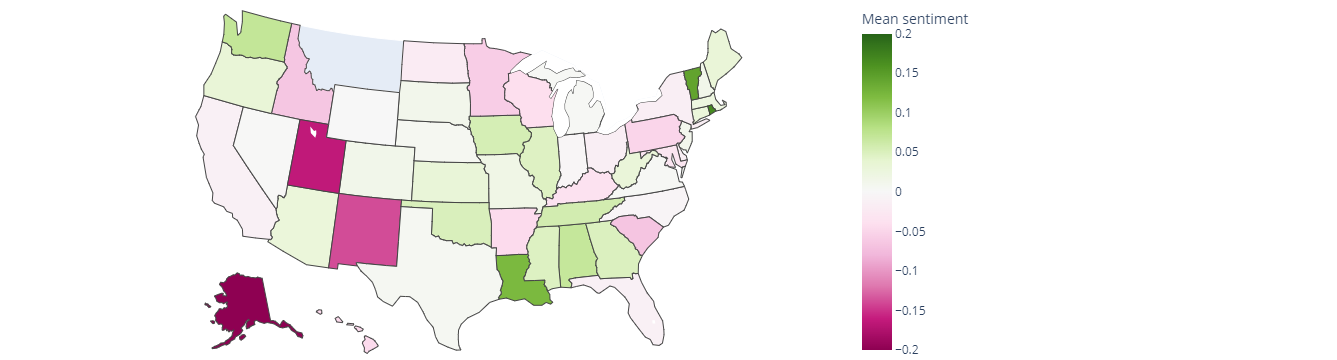

In [36]:
tweets_mean['text'] = tweets_mean['state']

fig = go.Figure(data=go.Choropleth(
    locations=tweets_mean['state_code'], # Spatial coordinates,
    z = tweets_mean['mean_sentiment'].astype(float), # Data to be color-coded
    locationmode='USA-states',
    #colorscale='RdBu',
    autocolorscale=True,
    text=tweets_mean['text'], # hover text
    #marker_line_color='white', # line markers between states
    colorbar_title="Mean sentiment", 
    zmin=-0.2, # min value for colorbar
    zmax=0.2 # max value for colorbar
))


fig.update_layout(
    #title_text='Sentiment around 2020 US presidential election',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.update_layout(margin={"r":500,"t":0,"l":100,"b":0})
fig.show()

### Violinplot over average sentiment for each party

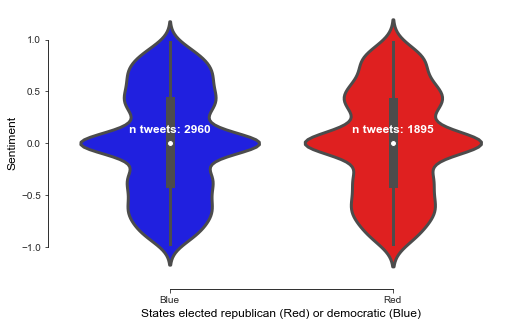

In [37]:
fig = plt.figure(figsize=(8, 5))
my_pal = {"Blue": "b", "Red": "r"}


#sns.set(style="darkgrid") # run this once for dark colored graphs, - dont know why

ax = sns.violinplot(x="state_color", y="sentiment_score", data=tweets_df3, palette=my_pal, linewidth=3)

# Calculate number of obs per group & median to position labels
medians = tweets_df3.groupby(['state_color'])['sentiment_score'].mean().values
nobs = tweets_df3['state_color'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n tweets: " + i for i in nobs]

# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick]+0.1, 
            nobs[tick],
            horizontalalignment='center',
            color='w', # text  color
            fontsize=12,
            weight='semibold'
           )
    
#colors
sns.set_style("white")

sns.despine(offset=10, trim=True); #remove unnecessary axis 
ax.set_xlabel('States elected republican (Red) or democratic (Blue)') # Choose title x-axis
ax.xaxis.label.set_fontsize(12) # Choose font size for x-axis title

ax.set_ylabel('Sentiment') # Choose title y-axis
ax.yaxis.label.set_fontsize(12) # Choose font size for y-axis title
fig.savefig('violinplot_red_blue.pdf') 

### Boxplot for sentiment for each source of the tweet
OBS: low n for various sources

see count below

In [38]:
tweets_df3_mean = tweets_df3.groupby(['source']) \
       .agg(count=('source', 'size'), mean_sentiment=('sentiment_score', 'mean')) \
       .reset_index()
tweets_df3_mean

,source,count,mean_sentiment
0,Brooklyn à la mode,1,-0.296000
1,Foursquare,2,-0.136600
2,Foursquare Swarm,2,0.351050
3,Hootsuite Inc.,3,0.628200
4,Instagram,32,0.028987
5,Squarespace,2,0.673300
6,TweetCaster for Android,2,0.288650
7,Tweetbot for Mac,2,-0.210100
8,Tweetbot for iΟS,17,0.291488
9,Tweetlogix,2,-0.328100


In [39]:
# only take n > 50

tweets_df3_mean = tweets_df3[tweets_df3['source'].isin(['Twitter for Android', 'Twitter for iPhone'])]
tweets_df3_mean.head(2)

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,...,state,country,state_code,Democratic,Democraticpct,Republican,Republicanpct,state_color,sentiment_score,tweet_sentiment
0,2020-09-15 23:55:19+00:00,i will not take the vaccine,Twitter for Android,@PK Trump Supporter,nlwestby,NaN,Oregon USA,US,False,"Christian Conservative Woman, Patriotic, Loyal...",...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0,1
1,2020-09-15 20:23:42+00:00,said out loud what im guessing is what the m...,Twitter for iPhone,David the Cancer Survivor.,Artistwhodreams,"Syracuse, NY",Corvallis OR,US,False,Art poetry and into damnation I travel.,...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0,1


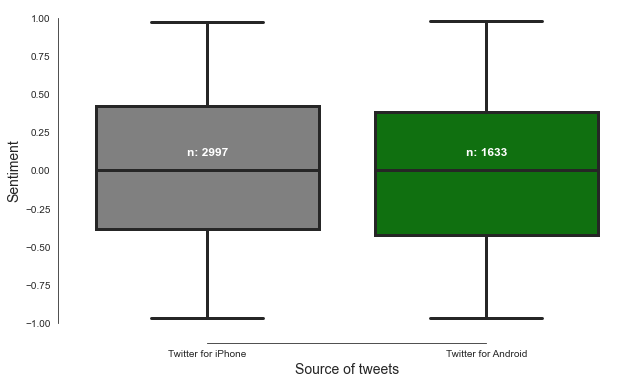

In [42]:
fig = plt.figure(figsize=(10, 6))
sns.set_style("white")
my_order = tweets_df3_mean.groupby(by=["source"])["sentiment_score"].count().iloc[::-1].index
my_pal = {"Twitter for Android": "green", "Twitter for iPhone": "grey"}


#sns.set(style="darkgrid") # run this once for dark colored graphs, - dont know why

#my_order = ["Twitter for iPhone", "Twitter for Android", "Twitter for iPad", "Tweetbot for iΟS", "Squarespace"]
ax = sns.boxplot(
                x="source", 
                y="sentiment_score", 
                data=tweets_df3_mean, 
                palette=my_pal,
                linewidth=3, 
                order=my_order
                )

# Calculate number of obs per group & median to position labels
means = tweets_df3_mean.groupby(['source'])['sentiment_score'].mean().values
nobs = tweets_df3_mean['source'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick],
            0+0.1, 
            nobs[tick],
            horizontalalignment='center',
            fontsize=12,
            color='w', # text  color
            weight='semibold'
           )

sns.set_style("white")

sns.despine(offset=10, trim=True); #remove unnecessary axis 
ax.set_xlabel('Source of tweets') # Choose title x-axis
ax.xaxis.label.set_fontsize(14) # Choose font size for x-axis title

ax.set_ylabel('Sentiment') # Choose title y-axis
ax.yaxis.label.set_fontsize(14) # Choose font size for y-axis title
fig.savefig('boxplot_source.pdf') 

# alt spiller hertil

#### sentiment over time for each party

In [225]:
tweets_mean_date = tweets_df3.groupby(['date', 'state_color']) \
       .agg(count=('state', 'size'), mean_sentiment=('sentiment_score', 'mean')) \
       .reset_index()
tweets_mean_date


KeyError: 'date'

In [38]:
tweets_mean_blue = tweets_mean_date.loc[tweets_mean_date['state_color'] == 'Blue']
tweets_mean_blue = tweets_mean_blue.reset_index(drop=True)

tweets_mean_red = tweets_mean_date.loc[tweets_mean_date['state_color'] == 'Red']
tweets_mean_red = tweets_mean_red.reset_index(drop=True)

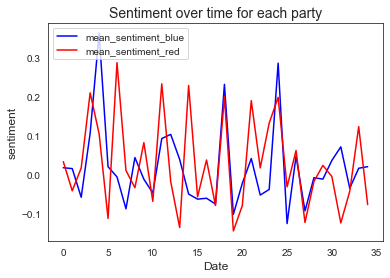

In [39]:
f,ax = plt.subplots()
mean_sentiment_blue = ax.plot(tweets_mean_blue['mean_sentiment'], color = 'blue', label='mean_sentiment_blue') # Choose lineplot
mean_sentiment_red = ax.plot(tweets_mean_red['mean_sentiment'], color = 'red', label='mean_sentiment_red') # Choose lineplot

ax.set_title('Sentiment over time for each party') # Choose title for plot
ax.title.set_fontsize(14) # Choose title font size

ax.set_xlabel('Date') # Choose title x-axis
ax.xaxis.label.set_fontsize(12) # Choose font size for x-axis title

ax.set_ylabel('sentiment') # Choose title y-axis
ax.yaxis.label.set_fontsize(12) # Choose font size for y-axis title

ax.legend(loc = 'upper left', bbox_to_anchor=(0, 1))


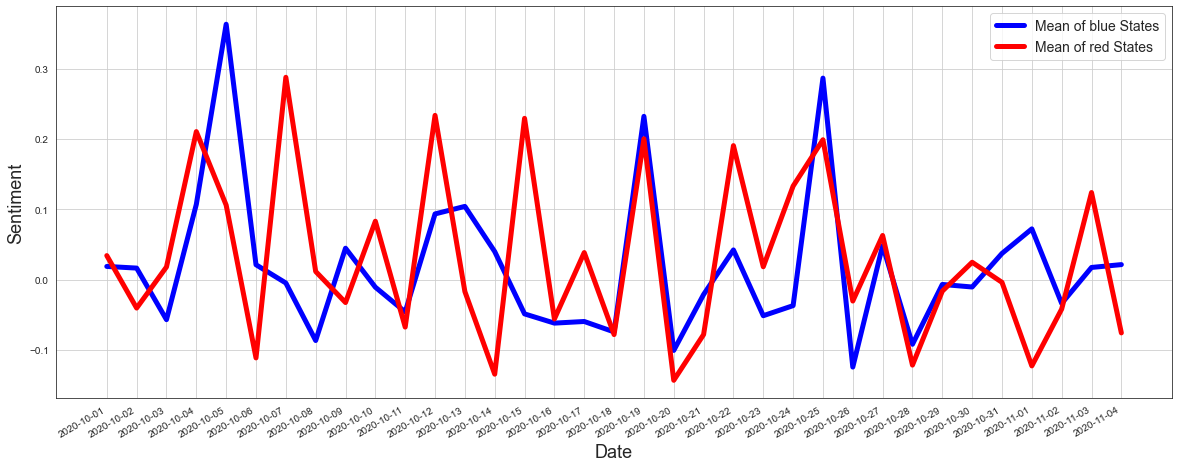

In [40]:
# Plot line
fig = plt.figure(figsize=(20, 8))
plt.plot(tweets_mean_blue["date"], tweets_mean_blue["mean_sentiment"], color = 'blue', label='Mean of blue States', linewidth=5)
plt.plot(tweets_mean_red["date"], tweets_mean_red["mean_sentiment"], color = 'red', label='Mean of red States', linewidth=5)

# Labelling 
plt.xlabel("Date", fontsize=18)
plt.ylabel("Sentiment", fontsize=18)

plt.grid(True)

# Auto space
plt.legend(fontsize=14)

# autoformat date
fig.autofmt_xdate()

#plt.annotate('Halloween', (mdates.date2num(x[1]), y[1]), xytext=(15, 15),
#            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

# EVENTUALLY change tick font size
# other type of line?
fig.savefig('timeseries_red_blue.pdf') 

# Alt godt heril

## Machine learning

### test train split

In [44]:
len(tweets_df3)

4855

In [47]:
tweets_df4 = tweets_df3.copy()

In [48]:
review_tokens = nltk.tokenize.word_tokenize(tweets_df4['text'])

TypeError: expected string or bytes-like object

In [126]:
tweets_df4

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,...,state,country,state_code,Democratic,Democraticpct,Republican,Republicanpct,state_color,sentiment_score,tweet_sentiment
0,2020-09-15 23:55:19+00:00,take vaccine,Twitter for Android,@PK Trump Supporter,nlwestby,NaN,Oregon USA,US,False,"Christian Conservative Woman, Patriotic, Loyal...",...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0000,1
1,2020-09-15 20:23:42+00:00,said loud im guessing majority americans think...,Twitter for iPhone,David the Cancer Survivor.,Artistwhodreams,"Syracuse, NY",Corvallis OR,US,False,Art poetry and into damnation I travel.,...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0000,1
2,2020-09-15 18:47:04+00:00,vaccine transparency efforts find deploy coron...,Twitter for iPhone,Dex 🪶,Dexcoon,"Mechanicsburg, PA",West Haven OR,US,False,"Gearhead, motorcycles, hiking, urbex, cuddlesl...",...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.7783,1
3,2020-09-15 18:25:22+00:00,full confidence fda nih put forth efficacious ...,Twitter for iPhone,Mamalou,Mamalou10343109,"Californien, USA",Harvey LA,US,False,My survival abilities,...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.8402,1
4,2020-09-16 23:48:48+00:00,silver bullet trumps entire strategy vaccine m...,Twitter for iPhone,Lia'sGrandma,SusanHaine,"Portland, OR",Portland OR,US,False,"Native cheesehead, #PDX, #PNW, Veteran's Wife,...",...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0772,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,2020-09-30 03:27:06+00:00,view truth said weeks away getting vaccine giv...,Twitter for Android,Anisha,anishaweimer,"New Jersey, USA",Bismarck ND,US,False,"Jersey girl at ❤️, Proud Penn State Alumna 😺 (...",...,North Dakota,United States,ND,114902,31.76%,235595,65.11%,Red,0.0680,1
4851,2020-10-06 19:49:50+00:00,live updates white house clears fda coronaviru...,Twitter for Android,Mike Fasano,fasanomike,Pasco County,Bismarck ND,US,False,Pasco County Tax Collector mfasano@pascotaxes...,...,North Dakota,United States,ND,114902,31.76%,235595,65.11%,Red,-0.2263,0
4852,2020-10-07 16:19:03+00:00,theres safe vaccine,Twitter for iPhone,Harry Bell,BellLawFirmWV,"Charleston, WV",Minot ND,US,False,Zealously representing people & biz for 42 yea...,...,North Dakota,United States,ND,114902,31.76%,235595,65.11%,Red,0.4404,1
4853,2020-10-11 14:19:38+00:00,thanks really still dont believe ill flying ea...,Tweetbot for iΟS,pam the butterfly gardner🦋🦋🐛🐛🌺🌹🌊,pamkanarr,"Florida, USA",North Dakota USA,US,False,"mom,grandma bakes cookies)I love nature butter...",...,North Dakota,United States,ND,114902,31.76%,235595,65.11%,Red,0.6057,1


In [ ]:
def remove_stopwords(tweet_text):
    """
    removes stop words defined by package nltk.corpus
    """
    tokens = nltk.TweetTokenizer().tokenize(tweet_text.lower()) # Keeps hashtag
    
    stop = stopwords.words('english')
    tweet_text = " ".join([word for word in tweet_text.split() if word not in (stop)])
    
    wnl = nltk.WordNetLemmatizer()
    review_lemma = [wnl.lemmatize(i) for i in tweet_text]

    return tweet_text

tweets_df4['text'] = tweets_df4['text'].apply(remove_stopwords)

In [121]:
# Example of the text process
tweets_df3['text'][2]

# Text
print('Old text: \n' + tweets_df3['text'][2]  + '\n')
print('New text (text): ' + str(len(tweets_df4['text'][2])) + ' list length \n' + tweets_df4['text'][2] + '\n')
#print('New text (Stems): ' + str(len(tweets_df4['text'][0])) + ' list length \n' + tweets_df4['text'][0] + '\n')

# Sentiment scores
print(f"The mean sentiment score is: {tweets_df3['sentiment_score'][2]}")


Old text: 
vaccine transparency  efforts to find and deploy a coronavirus vaccine have to be as transparent as possible to increase the chances for success            

New text (text): 106 list length 
vaccine transparency efforts find deploy coronavirus vaccine transparent possible increase chances success

The mean sentiment score is: 0.7783


In [235]:
# Delete rows with no final text (pictures and emoji)
tweets_df5 = tweets_df4[tweets_df4['text']!='None'].reset_index(drop=True)
tweets_df5

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,...,state,country,state_code,Democratic,Democraticpct,Republican,Republicanpct,state_color,sentiment_score,tweet_sentiment
0,2020-09-15 23:55:19+00:00,take vaccine,Twitter for Android,@PK Trump Supporter,nlwestby,NaN,Oregon USA,US,False,"Christian Conservative Woman, Patriotic, Loyal...",...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0000,1
1,2020-09-15 20:23:42+00:00,said loud im guessing majority americans think...,Twitter for iPhone,David the Cancer Survivor.,Artistwhodreams,"Syracuse, NY",Corvallis OR,US,False,Art poetry and into damnation I travel.,...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0000,1
2,2020-09-15 18:47:04+00:00,vaccine transparency efforts find deploy coron...,Twitter for iPhone,Dex 🪶,Dexcoon,"Mechanicsburg, PA",West Haven OR,US,False,"Gearhead, motorcycles, hiking, urbex, cuddlesl...",...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.7783,1
3,2020-09-15 18:25:22+00:00,full confidence fda nih put forth efficacious ...,Twitter for iPhone,Mamalou,Mamalou10343109,"Californien, USA",Harvey LA,US,False,My survival abilities,...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.8402,1
4,2020-09-16 23:48:48+00:00,silver bullet trumps entire strategy vaccine m...,Twitter for iPhone,Lia'sGrandma,SusanHaine,"Portland, OR",Portland OR,US,False,"Native cheesehead, #PDX, #PNW, Veteran's Wife,...",...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0772,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,2020-09-30 03:27:06+00:00,view truth said weeks away getting vaccine giv...,Twitter for Android,Anisha,anishaweimer,"New Jersey, USA",Bismarck ND,US,False,"Jersey girl at ❤️, Proud Penn State Alumna 😺 (...",...,North Dakota,United States,ND,114902,31.76%,235595,65.11%,Red,0.0680,1
4851,2020-10-06 19:49:50+00:00,live updates white house clears fda coronaviru...,Twitter for Android,Mike Fasano,fasanomike,Pasco County,Bismarck ND,US,False,Pasco County Tax Collector mfasano@pascotaxes...,...,North Dakota,United States,ND,114902,31.76%,235595,65.11%,Red,-0.2263,0
4852,2020-10-07 16:19:03+00:00,theres safe vaccine,Twitter for iPhone,Harry Bell,BellLawFirmWV,"Charleston, WV",Minot ND,US,False,Zealously representing people & biz for 42 yea...,...,North Dakota,United States,ND,114902,31.76%,235595,65.11%,Red,0.4404,1
4853,2020-10-11 14:19:38+00:00,thanks really still dont believe ill flying ea...,Tweetbot for iΟS,pam the butterfly gardner🦋🦋🐛🐛🌺🌹🌊,pamkanarr,"Florida, USA",North Dakota USA,US,False,"mom,grandma bakes cookies)I love nature butter...",...,North Dakota,United States,ND,114902,31.76%,235595,65.11%,Red,0.6057,1


In [51]:
# list of tweet sentiments
tweet_sentiments = [0 if i < 0 else 1 for i in tweets_df5.sentiment_score]

In [226]:

# splitting dataset into test and train
df_train, df_test = train_test_split(tweets_df4, test_size=.5, random_state=1337)


In [227]:
# Sort the data randomly to mix positive and negative reviews
np.random.seed(0)
df_train = tweets_df4.reindex(np.random.permutation(df_train.index))
df_test = tweets_df4.reindex(np.random.permutation(df_test.index))

# Take out X and Y variable
x_train = df_train['text'].values
x_test = df_test['text'].values
y_train = df_train['tweet_sentiment'].values
y_test = df_test['tweet_sentiment'].values

# Make our bag of words
tfidf = TfidfVectorizer()
x_train_bag = tfidf.fit_transform(x_train)

# Fit the model
lr_text = LogisticRegression(random_state=0) #Text classifier
lr_text.fit(x_train_bag,y_train)

LogisticRegression(random_state=0)

In [236]:
tweets_bag = tfidf.transform(tweets_df5['text'].values)

preds = lr_text.predict(tweets_bag)
print("Testing accuracy =",np.mean([(preds==tweets_df5['tweet_sentiment'])]))

Testing accuracy = 0.7829042224510814


In [237]:
tfidf_tweet = TfidfVectorizer()
tweets_new_bag = tfidf_tweet.fit_transform(tweets_df5['text'].values)


#review_array = tweets_df4['text'].values[0:2] #Take the first two reviews and store them in an array
#bag_count = CountVectorizer.fit_transform(review_array) #fit_transform takes an array as input and outputs the bag of words

In [248]:
tweets_df5

,created_at,text,source,name,username,user_location,tweet_location,country_code,verified,description,...,state,country,state_code,Democratic,Democraticpct,Republican,Republicanpct,state_color,sentiment_score,tweet_sentiment
0,2020-09-15 23:55:19+00:00,take vaccine,Twitter for Android,@PK Trump Supporter,nlwestby,NaN,Oregon USA,US,False,"Christian Conservative Woman, Patriotic, Loyal...",...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0000,1
1,2020-09-15 20:23:42+00:00,said loud im guessing majority americans think...,Twitter for iPhone,David the Cancer Survivor.,Artistwhodreams,"Syracuse, NY",Corvallis OR,US,False,Art poetry and into damnation I travel.,...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0000,1
2,2020-09-15 18:47:04+00:00,vaccine transparency efforts find deploy coron...,Twitter for iPhone,Dex 🪶,Dexcoon,"Mechanicsburg, PA",West Haven OR,US,False,"Gearhead, motorcycles, hiking, urbex, cuddlesl...",...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.7783,1
3,2020-09-15 18:25:22+00:00,full confidence fda nih put forth efficacious ...,Twitter for iPhone,Mamalou,Mamalou10343109,"Californien, USA",Harvey LA,US,False,My survival abilities,...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.8402,1
4,2020-09-16 23:48:48+00:00,silver bullet trumps entire strategy vaccine m...,Twitter for iPhone,Lia'sGrandma,SusanHaine,"Portland, OR",Portland OR,US,False,"Native cheesehead, #PDX, #PNW, Veteran's Wife,...",...,Oregon,United States,OR,1340383,56.45%,958448,40.37%,Blue,0.0772,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,2020-09-30 03:27:06+00:00,view truth said weeks away getting vaccine giv...,Twitter for Android,Anisha,anishaweimer,"New Jersey, USA",Bismarck ND,US,False,"Jersey girl at ❤️, Proud Penn State Alumna 😺 (...",...,North Dakota,United States,ND,114902,31.76%,235595,65.11%,Red,0.0680,1
4851,2020-10-06 19:49:50+00:00,live updates white house clears fda coronaviru...,Twitter for Android,Mike Fasano,fasanomike,Pasco County,Bismarck ND,US,False,Pasco County Tax Collector mfasano@pascotaxes...,...,North Dakota,United States,ND,114902,31.76%,235595,65.11%,Red,-0.2263,0
4852,2020-10-07 16:19:03+00:00,theres safe vaccine,Twitter for iPhone,Harry Bell,BellLawFirmWV,"Charleston, WV",Minot ND,US,False,Zealously representing people & biz for 42 yea...,...,North Dakota,United States,ND,114902,31.76%,235595,65.11%,Red,0.4404,1
4853,2020-10-11 14:19:38+00:00,thanks really still dont believe ill flying ea...,Tweetbot for iΟS,pam the butterfly gardner🦋🦋🐛🐛🌺🌹🌊,pamkanarr,"Florida, USA",North Dakota USA,US,False,"mom,grandma bakes cookies)I love nature butter...",...,North Dakota,United States,ND,114902,31.76%,235595,65.11%,Red,0.6057,1


In [255]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer() #Store the class in 'count' to ease coding

review_array =tweets_df5['text'] #Take the first two reviews and store them in an array
bag = count.fit_transform(review_array) #fit_transform takes an array as input and outputs the bag of words

In [320]:
count_array = bag.toarray() #Make the bag to an array
matrix = pd.DataFrame(data=count_array,columns = count.get_feature_names_out()) #Input the bag and the words into a dataframe
matrix

,aaasforum,aahaaafp,aampm,aap,aapl,ab,abandoned,abandoning,abating,abbott,...,zoo,zoom,zoomlighting,zzzz,çhip,χoρoshό,иo,чувствую,नपल,打了混合疫苗is
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [321]:
matrix2 = matrix.T
matrix2

,0,1,2,3,4,5,6,7,8,9,...,4845,4846,4847,4848,4849,4850,4851,4852,4853,4854
aaasforum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aahaaafp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aampm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aapl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
χoρoshό,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
иo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
чувствую,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
नपल,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [322]:
matrix2['Sum']=matrix2.iloc[:,:].sum(axis=1)
matrix2 = matrix2.sort_values(by=['Sum'], ascending=False).head(20)
matrix2

,0,1,2,3,4,5,6,7,8,9,...,4846,4847,4848,4849,4850,4851,4852,4853,4854,Sum
vaccine,1,1,2,1,2,1,1,1,1,1,...,0,1,1,0,1,1,1,1,0,4306
covid,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1101
vaccines,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,902
trump,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,844
get,0,0,0,0,0,1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,659
people,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,564
flu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,477
dont,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,0,464
take,1,2,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,463
amp,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,445


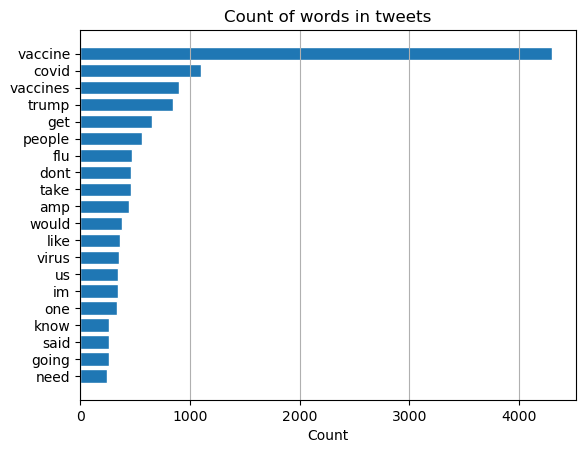

In [339]:
#plt.plot(matrix2['Sum'], matrix2.index.values)
#plt.show()



plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(matrix2.index.values, matrix2['Sum'], align='center',  edgecolor='white')
ax.set_yticks(matrix2.index.values, labels=matrix2.index.values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Count of words in tweets')
ax.xaxis.grid(True)

plt.show()

#fig.tight_layout()
fig.savefig('word_frequency.pdf') 

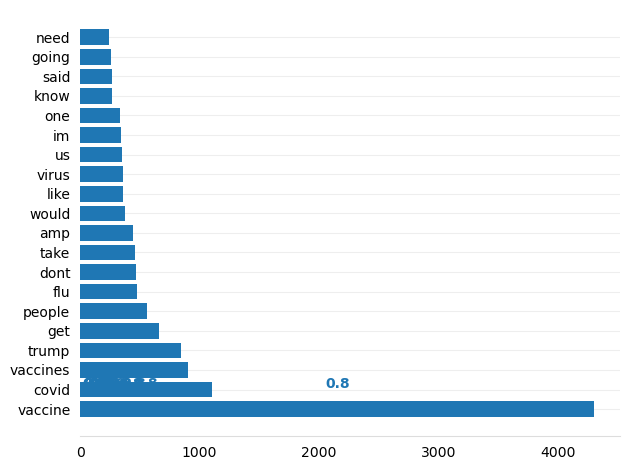

In [331]:
fig, ax = plt.subplots()

# Save the chart so we can loop through the bars below.
bars = ax.barh(
    matrix2.index.values,
    matrix2['Sum'],
    tick_label=matrix2.index.values
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Grab the color of the bars so we can make the
# text the same color.
bar_color = bars[0].get_facecolor()

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

fig.tight_layout()

In [257]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer() #Ease coding
bag_tfidf = tfidf.fit_transform(bag) #Compute the tf-idf score from the bag of words from before ('bag')

In [258]:
tfidf_array = bag_tfidf.toarray() #Make the bag to an array
matrix_tfidf = pd.DataFrame(data=tfidf_array, columns = count.get_feature_names_out()) #Input the bag and the words into a dataframe
matrix_tfidf

,aaasforum,aahaaafp,aampm,aap,aapl,ab,abandoned,abandoning,abating,abbott,...,zoo,zoom,zoomlighting,zzzz,çhip,χoρoshό,иo,чувствую,नपल,打了混合疫苗is
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
count = CountVectorizer(ngram_range=(2,2)) #Choose only 2-grams

review_array = df['review'].values[0:2]
bag = count.fit_transform(review_array)

count_array = bag.toarray() #Make the bag to an array
matrix = pd.DataFrame(data=count_array,columns = count.get_feature_names_out()) #Input the bag and the words into a dataframe
matrix

### ML v2

In [136]:
# Make our bag of words
tfidf_tweet = TfidfVectorizer()
tweets_new_bag = tfidf_tweet.fit_transform(tweets_df4['text'].values)

# Fit the model
lr_tweets = LogisticRegression(random_state=0) #Text classifier
lr_tweets.fit(tweets_new_bag, tweet_sentiments)


LogisticRegression(random_state=0)

In [215]:
lr_tweets

LogisticRegression(random_state=0)

In [241]:

# Make our bag of words
tweets_features = ['_'.join(s.split()) for s in tfidf_tweet.get_feature_names_out()]
tweets_coefficients = lr_tweets.coef_
tweets_coefs_df = pd.DataFrame.from_records(tweets_coefficients, columns=tweets_features)

# Most important (positive and negative) features:
print()
pos_words = tweets_coefs_df.T.sort_values(by=[0], ascending=False).head(20)
print(pos_words)
print()
neg_words = tweets_coefs_df.T.sort_values(by=[0], ascending=True).head(20)
print(neg_words)


                    0
great        2.703479
safe         2.671057
free         2.585068
effective    2.201653
vaccine      1.995205
better       1.850217
well         1.763731
best         1.673573
win          1.594879
like         1.516261
safety       1.386724
please       1.379006
lol          1.335317
hope         1.314373
good         1.293756
thanks       1.289148
trials       1.259716
love         1.237398
hoping       1.233763
interesting  1.228473

                0
flu     -4.506526
ill     -3.236517
shit    -3.156616
die     -2.534660
lying   -2.534142
lies    -2.461137
death   -2.318077
fear    -2.295131
fake    -2.285733
illness -2.252414
damn    -2.206419
sick    -2.147140
hoax    -2.114353
dead    -2.103677
kill    -2.099899
idiot   -2.066607
killed  -2.065775
hell    -2.065338
died    -1.979945
stupid  -1.895468


In [212]:
tweets_coefs_df

,aaasforum,aahaaafp,aampm,aap,aapl,ab,abandoned,abandoning,abating,abbott,...,zoo,zoom,zoomlighting,zzzz,çhip,χoρoshό,иo,чувствую,नपल,打了混合疫苗is
0,0.102834,0.080724,0.113279,0.21853,0.070231,0.121123,-0.198594,-0.132738,-0.073879,0.079365,...,0.0672,0.150944,-0.146082,0.101908,-0.112049,0.068613,0.068613,0.068613,0.145356,0.144926


In [242]:
tweets_df5 = tweets_df4.copy()

In [203]:
# implementing logistic regression with an ML model 
tweets_df5['state_color_bool'] = [0 if i == 'Blue' else 1 for i in tweets_df5.state_color]
X, y = tweets_df5['text'], tweets_df5['state_color_bool']

# Dividing the dataset into a test and training set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# vectorize the text variable to get a array of features for the logistic regression
vect = CountVectorizer(ngram_range=(1,4), max_features = 300)
X_train = vect.fit_transform(X_train)
X_test = vect.fit_transform(X_test)

# Check distribution of political wings in the train and test set
print("We have " + str(np.round(sum(y_train)/len(y_train)*100,2)) + '% of democratic tweets in our train')
print("We have " + str(np.round(sum(y_test)/len(y_test)*100,2)) + '% of democratic tweets in our test')

We have 38.93% of democratic tweets in our train
We have 39.26% of democratic tweets in our test


In [204]:
# Look at the list of features
vect.get_feature_names()[0:10]

['actually',
 'administration',
 'along',
 'already',
 'also',
 'america',
 'american',
 'americans',
 'amp',
 'another']

In [205]:
# fit the model on the training data and calculate predictions on the test data
model = LogisticRegression(max_iter = 1000, solver = 'saga', penalty ='l1', fit_intercept=True ).fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = y_pred

In [206]:
print('Our testset is: ' + str(len(y_test)) + ' observation \nTrue: ' + str(y_test.sum()) + ' democratic tweets' )
a = y_pred == y_test
print('We found: ' + str(y_pred.sum()) + ' Democratic tweets \nWe predicted: ' + str(np.round(a.mean()*100,2)) + ' % correct tweets overall')
a = Counter(y_pred-y_test)

print('\nWe missed to predict: ' + str(a[-1]) + ' Tweets \n\nOf the predicted democratic (' + str(y_pred.sum()) + ') \nCorrect prediction: ' + str(y_pred.sum()-a[1]) + '\nWrong prediction: ' + str(a[1]))

print('\nOf the predicted Red (' + str(len(y_pred) - y_pred.sum()) + ') \nCorrect prediction: ' + str(len(y_pred) - y_pred.sum()-a[-1]) + '\nWrong prediction: ' + str(a[-1]))



Our testset is: 1457 observation 
True: 572 democratic tweets
We found: 484 Democratic tweets 
We predicted: 52.64 % correct tweets overall

We missed to predict: 389 Tweets 

Of the predicted democratic (484) 
Correct prediction: 183
Wrong prediction: 301

Of the predicted Red (973) 
Correct prediction: 584
Wrong prediction: 389


### Tokenization

### Stemming